In [1]:
from embiggen.node_prediction import GraphConvolutionalNeuralNetwork
from ensmallen_graph.datasets.linqs import Cora
from ensmallen_graph.datasets.linqs.parse_linqs import get_words_data
from plot_keras_history import plot_history
from tensorflow.keras import regularizers
import pandas as pd

Using TensorFlow backend.


In [2]:
cora = Cora()
features = get_words_data(cora)
cora = cora.filter_from_names(node_type_name_to_filter=['Word']).remove_edge_weights().remove_edge_types()
features = features.loc[cora.get_node_names()]
#cora = cora.generate_new_edges_from_node_features(features.values, neighbours_number=3, max_degree=3)
cora

Extracting words features:   0%|          | 0/4141 [00:00<?, ?it/s]

<h2>Cora</h2>The undirected graph Cora has 2708 heterogenous nodes and 5278 edges.<br><h3>Degree centrality</h3>The minimum node degree is 1, the maximum node degree is 168, the mode degree is 2, the mean degree is 3.90 and the node degree median is 3.<br>The nodes with highest degree centrality are: 35 (degree 168 and node type Genetic_Algorithms), 6213 (degree 78 and node type Reinforcement_Learning), 1365 (degree 74 and node type Neural_Networks), 3229 (degree 65 and node type Neural_Networks) and 910 (degree 44 and node type Neural_Networks).<br><h3>Node types</h3>The graph has 7 node types, of which the 5 most common are Neural_Networks (818 nodes, 30.21%), Probabilistic_Methods (426 nodes, 15.73%), Genetic_Algorithms (418 nodes, 15.44%), Theory (351 nodes, 12.96%) and Case_Based (298 nodes, 11.00%).<br>

In [3]:
cora = cora.get_unweighted_symmetric_normalized_transformed_graph()
cora = cora.add_selfloops(weight=1.0)

In [4]:
train, test = cora.node_label_holdout(0.8, use_stratification=True)

In [9]:
model = GraphConvolutionalNeuralNetwork(
    cora,
    node_features_number=100
)

In [10]:
model.summary()

Model: "GCN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2708)]            0         
_________________________________________________________________
graph_convolution_1 (GraphCo (None, 7)                 707       
Total params: 707
Trainable params: 707
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(
    train,
    validation_graph=test,
    batch_size=256
)

0epoch [00:00, ?epoch/s]

(<Figure size 1440x720 with 8 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4ff3ab8d0>,
       dtype=object))

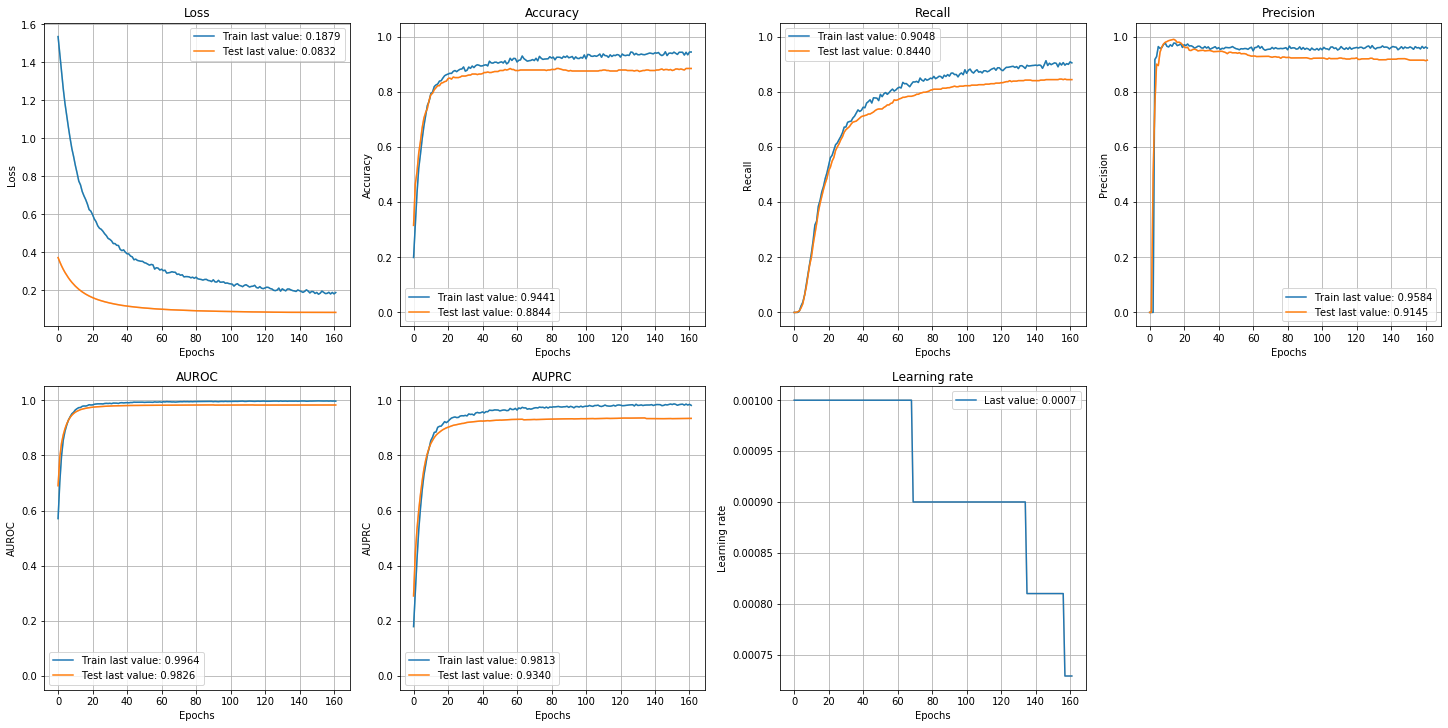

In [8]:
plot_history(history)